# Natural Language Processing (NLP)

## Part 1: Reading in the Yelp Reviews

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

C:\Users\Mohan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from textblob import TextBlob, Word

In [4]:
# read yelp.csv into a DataFrame
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/yelp.csv' 
yelp = pd.read_csv(url)

In [5]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Part 2: Tokenization

In [7]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [8]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [11]:
#X_train_dtm[50:]

<3014x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 234123 stored elements in Compressed Sparse Row format>

In [12]:
X_test_dtm.shape

(1022, 16825)

In [13]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(3064, 16825)

In [15]:
# last 50 features
print (vect.get_feature_names()[-50:])

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [16]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [17]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 20838)

In [13]:
CountVectorizer?

In [14]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

In [15]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zone out', u'zone when', u'zones', u'zones dolls', u'zoning', u'zoning issues', u'zoo', u'zoo and', u'zoo is', u'zoo not', u'zoo the', u'zoo ve', u'zoyo', u'zoyo for', u'zucca', u'zucca appetizer', u'zucchini', u'zucchini and', u'zucchini bread', u'zucchini broccoli', u'zucchini carrots', u'zucchini fries', u'zucchini pieces', u'zucchini strips', u'zucchini veal', u'zucchini very', u'zucchini with', u'zuchinni', u'zuchinni again', u'zuchinni the', u'zumba', u'zumba class', u'zumba or', u'zumba yogalates', u'zupa', u'zupa flavors', u'zuzu', u'zuzu in', u'zuzu is', u'zuzu the', u'zwiebel', u'zwiebel kr\xe4uter', u'zzed', u'zzed in', u'\xe9clairs', u'\xe9clairs napoleons', u'\xe9cole', u'\xe9cole len\xf4tre', u'\xe9m', u'\xe9m all']


**Predicting the star rating:**

In [16]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


In [17]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.81996086105675148

In [19]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [23]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 1), min_df=2)
tokenize_test(vect)

Features:  8783
Accuracy:  0.924657534247


## Part 3: Stopword Removal

In [21]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [24]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  16528
Accuracy:  0.915851272016


In [25]:
# set of stop words
print (vect.get_stop_words())

frozenset({'once', 'down', 'always', 're', 'to', 'formerly', 'first', 'each', 'via', 'most', 'con', 'indeed', 'not', 'also', 'noone', 'bottom', 'part', 'my', 'few', 'put', 'below', 'thru', 'up', 'would', 'forty', 'between', 'co', 'can', 'this', 'upon', 'was', 'please', 'least', 'otherwise', 'never', 'hereafter', 'call', 'cannot', 'themselves', 'without', 'along', 'rather', 'several', 'before', 'moreover', 'serious', 'whose', 'if', 'therein', 'same', 'find', 'whereupon', 'with', 'nothing', 'herein', 'have', 'under', 'latter', 'either', 'full', 'other', 'afterwards', 'eight', 'has', 'thick', 'couldnt', 'amount', 'un', 'for', 'what', 'describe', 'side', 'must', 'thin', 'two', 'many', 'back', 'ltd', 'inc', 'now', 'be', 'even', 'cant', 'been', 'were', 'becoming', 'onto', 'others', 'amongst', 'after', 'her', 'hasnt', 'where', 'go', 'latterly', 'name', 'nevertheless', 'until', 'although', 'such', 'seems', 'against', 'there', 'eleven', 'sometimes', 'here', 'in', 'beyond', 'next', 'only', 'ther

## Part 4: Other CountVectorizer Options

In [21]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.869863013699


In [88]:
# all 100 features
print vect.get_feature_names()

[u'amazing', u'area', u'atmosphere', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'came', u'cheese', u'chicken', u'clean', u'coffee', u'come', u'day', u'definitely', u'delicious', u'did', u'didn', u'dinner', u'don', u'eat', u'excellent', u'experience', u'favorite', u'feel', u'food', u'free', u'fresh', u'friendly', u'friends', u'going', u'good', u'got', u'great', u'happy', u'home', u'hot', u'hour', u'just', u'know', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'lunch', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'perfect', u'phoenix', u'pizza', u'place', u'pretty', u'prices', u'really', u'recommend', u'restaurant', u'right', u'said', u'salad', u'sandwich', u'sauce', u'say', u'service', u'staff', u'store', u'sure', u'table', u'thing', u'things', u'think', u'time', u'times', u'took', u'town', u'tried', u'try', u've', u'wait', u'want', u'way', u'went', u'wine', u'work', u'worth', 

In [26]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.885518590998


In [27]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  43957
Accuracy:  0.932485322896


## Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [28]:
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [24]:
# print the first review
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [30]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [31]:
print (dir(review))

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cmpkey', '_compare', '_create_sentence_objects', '_strkey', 'analyzer', 'classifier', 'classify', 'correct', 'detect_language', 'ends_with', 'endswith', 'find', 'format', 'index', 'join', 'json', 'lower', 'ngrams', 'noun_phrases', 'np_counts', 'np_extractor', 'parse', 'parser', 'polarity', 'pos_tagger', 'pos_tags', 'raw', 'raw_sentences', 'replace', 'rfind', 'rindex', 'sentences', 'sentiment', 'serialized', 'split', 'starts_with', 'startswith', 'string', 'strip', 'stripped', 'subjectivity', 'tags', 'title', 'to_json', 'tokenize', 'tokenizer', 'tokens', 'translate', 'translator', 'u

In [32]:
print (review.ngrams(2))

[WordList(['My', 'wife']), WordList(['wife', 'took']), WordList(['took', 'me']), WordList(['me', 'here']), WordList(['here', 'on']), WordList(['on', 'my']), WordList(['my', 'birthday']), WordList(['birthday', 'for']), WordList(['for', 'breakfast']), WordList(['breakfast', 'and']), WordList(['and', 'it']), WordList(['it', 'was']), WordList(['was', 'excellent']), WordList(['excellent', 'The']), WordList(['The', 'weather']), WordList(['weather', 'was']), WordList(['was', 'perfect']), WordList(['perfect', 'which']), WordList(['which', 'made']), WordList(['made', 'sitting']), WordList(['sitting', 'outside']), WordList(['outside', 'overlooking']), WordList(['overlooking', 'their']), WordList(['their', 'grounds']), WordList(['grounds', 'an']), WordList(['an', 'absolute']), WordList(['absolute', 'pleasure']), WordList(['pleasure', 'Our']), WordList(['Our', 'waitress']), WordList(['waitress', 'was']), WordList(['was', 'excellent']), WordList(['excellent', 'and']), WordList(['and', 'our']), Word

In [33]:
review.sentiment

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)

In [31]:
# list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [32]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [33]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

In [34]:
import nltk as nltk

In [35]:
print (dir(nltk))

['AbstractLazySequence', 'AffixTagger', 'AlignedSent', 'Alignment', 'AnnotationTask', 'ApplicationExpression', 'Assignment', 'BigramAssocMeasures', 'BigramCollocationFinder', 'BigramTagger', 'BinaryMaxentFeatureEncoding', 'BlanklineTokenizer', 'BllipParser', 'BottomUpChartParser', 'BottomUpLeftCornerChartParser', 'BottomUpProbabilisticChartParser', 'Boxer', 'BrillTagger', 'BrillTaggerTrainer', 'CFG', 'CRFTagger', 'CfgReadingCommand', 'ChartParser', 'ChunkParserI', 'ChunkScore', 'ClassifierBasedPOSTagger', 'ClassifierBasedTagger', 'ClassifierI', 'ConcordanceIndex', 'ConditionalExponentialClassifier', 'ConditionalFreqDist', 'ConditionalProbDist', 'ConditionalProbDistI', 'ConfusionMatrix', 'ContextIndex', 'ContextTagger', 'ContingencyMeasures', 'CoreNLPDependencyParser', 'CoreNLPParser', 'Counter', 'CrossValidationProbDist', 'DRS', 'DecisionTreeClassifier', 'DefaultTagger', 'DependencyEvaluator', 'DependencyGrammar', 'DependencyGraph', 'DependencyProduction', 'DictionaryConditionalProbDis

In [113]:
review.ngrams(n=2)

[WordList(['My', 'wife']),
 WordList(['wife', 'took']),
 WordList(['took', 'me']),
 WordList(['me', 'here']),
 WordList(['here', 'on']),
 WordList(['on', 'my']),
 WordList(['my', 'birthday']),
 WordList(['birthday', 'for']),
 WordList(['for', 'breakfast']),
 WordList(['breakfast', 'and']),
 WordList(['and', 'it']),
 WordList(['it', 'was']),
 WordList(['was', 'excellent']),
 WordList(['excellent', 'The']),
 WordList(['The', 'weather']),
 WordList(['weather', 'was']),
 WordList(['was', 'perfect']),
 WordList(['perfect', 'which']),
 WordList(['which', 'made']),
 WordList(['made', 'sitting']),
 WordList(['sitting', 'outside']),
 WordList(['outside', 'overlooking']),
 WordList(['overlooking', 'their']),
 WordList(['their', 'grounds']),
 WordList(['grounds', 'an']),
 WordList(['an', 'absolute']),
 WordList(['absolute', 'pleasure']),
 WordList(['pleasure', 'Our']),
 WordList(['Our', 'waitress']),
 WordList(['waitress', 'was']),
 WordList(['was', 'excellent']),
 WordList(['excellent', 'and']),

## Part 6: Stemming and Lemmatization

In [36]:
# initialize stemmer
stemmer = SnowballStemmer('english')
stemmer

In [118]:
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [37]:
# stem each word
print ([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [121]:
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [122]:
# assume every word is a noun
print ([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'wa', 'excellent', 'The', 'weather', u'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', u'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', u'egg', 'vegetabl

In [123]:
# assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', u'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'be', 'excellent', 'The', 'weather', u'be', 'perfect', 'which', u'make', u'sit', 'outside', u'overlook', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'be', 'excellent', 'and', 'our', 'food', u'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', u'look', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', u'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'be', u'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', u'have', 'the', 'white', 'truffle', u'scramble', u'egg', 'vegetable

In [124]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return ([word.lemmatize() for word in words])

In [125]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  16452
Accuracy:  0.920743639922


In [39]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'yuyuyummy', u'yuzu', u'z', u'z-grill', u'z11', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zen-like', u'zero', u'zero-star', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zipps', u'ziti', u'zoe', u'zombi', u'zombie', u'zone', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel-kr\xe4uter', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

In [38]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [40]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [128]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [129]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [130]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

## Part 8: Using TF-IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [131]:
TfidfVectorizer?

In [41]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [39]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [40]:
summarize()

TOP SCORING WORDS:
pushes
cheesey
processing
greedy
discouraged

RANDOM WORDS:
cheesey
work
fat
sitting
thing

This place pushes out some delicious food, Red chile burro with rice and beans is better than any I've had, and their Nachos are soooo freaking cheesey and good you'll want to order both for one sitting. Unfortunately only outside seating but cool art work on the building to enjoy while eating and don't be discouraged by there greedy practice of charging for extra hot sauce. But of all things to remember make sure you bring cash the place can't afford a card processing machine which is a good thing other wise I'd be there too often and a fat face looks weird on me


## Part 9: Sentiment Analysis

In [48]:
print review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [41]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [50]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [48]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [50]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

In [46]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,0.402469
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,0.229773
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,0.566667
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,0.608646
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,0.468125


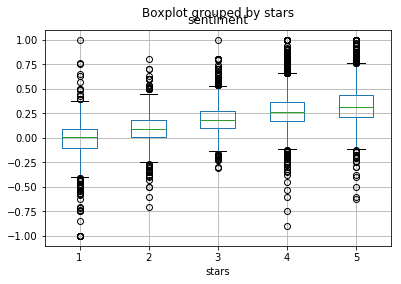

In [47]:
# box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [142]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [143]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [148]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [149]:
# negative sentiment in a 5-star review
print yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].text

390     RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!
1287                                             Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.
3075                                                                                                                                                     Unfortunately Out of Business.
3516                                                                                                      Cashew brittle, almond brittle, bacon brittle!  Go now, before it's too late!
6726                                                                                            Brown bag chicken sammich, mac n cheese, fried okra, and the bourbon drink.  Nuff said.
9809                                                             I have to tell 

In [151]:
# positive sentiment in a 1-star review
print yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].text 

1781                                                                                                                                                                                                                                                                 If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.
2353    My co-workers and I refer to this place as "Pizza n' Ants".  The staff will be happy to serve you with bare hands, right after using the till.  Also, as the nickname suggests, there has been a noticable insect problem. \n\n\n\nAs if that could all be overlooked, the pizza isn't even good.  If you are in this part of town, go to Z Pizza or Slices for great pizza instead!
5257                                                                        Remember how I said that the Trivia was the best thing about this place?  Well, they got rid of long time Triva host, Dave (who had been featured in the College T

In [60]:
# reset the column display width
pd.reset_option('max_colwidth')

## Bonus: Adding Features to a Document-Term Matrix

In [48]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [49]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print X_train_dtm.shape
print X_test_dtm.shape

(3064, 16825)
(1022, 16825)


In [50]:
# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [51]:
# cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [52]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [53]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [54]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)

0.917808219178


In [55]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print metrics.accuracy_score(y_test, y_pred_class)

0.922700587084


## Bonus: Fun TextBlob Features

In [69]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [70]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]

In [71]:
# definitions
Word('bank').define('v')

[u'tip laterally',
 u'enclose with a bank',
 u'do business with a bank or keep an account at a bank',
 u'act as the banker in a game or in gambling',
 u'be in the banking business',
 u'put into a bank account',
 u'cover with ashes so to control the rate of burning',
 u'have confidence or faith in']

In [72]:
# language identification 
TextBlob('Hola amigos').detect_language()

u'es'